1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга 
(ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), 
а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

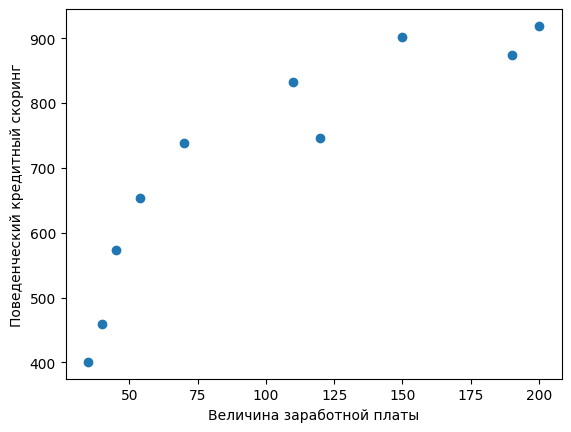

In [4]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

коэффициент b:

In [5]:

b=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

величина интерсепта:

In [6]:
a=np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

линейная взаимосвязь:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


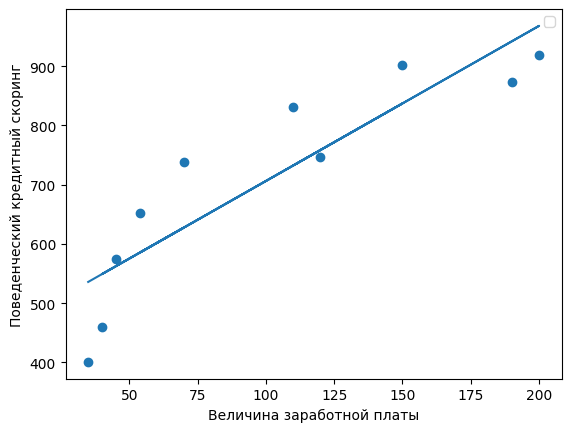

In [8]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp)
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()


In [9]:
ks=ks.reshape((-1,1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [10]:
zp=zp.reshape((-1,1))
zp=np.hstack([np.ones((len(zp),1)),zp])
zp

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

вектор коэффициентов линейной регрессии:

In [17]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
print(B)



[[444.17735732]
 [  2.62053888]]


In [19]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks=ks.reshape((-1,1))
zp=zp.reshape((-1,1))
B2=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
print(B2)


[[5.88982042]]


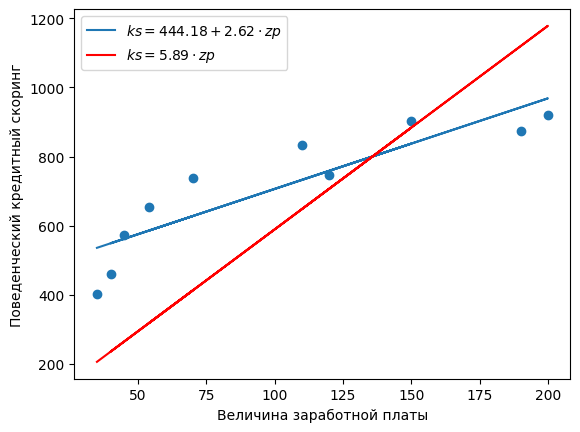

In [22]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, label=r'$ks=444.18+2.62\cdot zp$')
plt.plot(zp, B2*zp, c='r', label=r'$ks=5.89\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()


2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [23]:
def mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

B = 2.62

print(mse(B, zp, ks))

203812.48504


In [27]:
def mse__b_to_zero(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)

speed = 1e-06
b=0.1
mse_min = mse(b,zp,ks)
i_min = 1
b_min = b
for i in range(10000):
    b -= speed * mse__b_to_zero(b,zp,ks)
    if i%100 == 0:
        print(f'Try #{i}, B={b}, mse={mse(b, zp, ks)}')
    if mse(b, zp, ks) > mse_min:
        print(f'Try #{i_min}, B={b_min}, mse={mse_min}')
        break
    else:
        mse_min = mse(b, zp, ks)
        i_min = i
        b_min = b

print(b_min)

Try #0, B=0.25952808000000005, mse=493237.7212546963
Try #100, B=5.54537842245223, mse=58151.31823171113
Try #200, B=5.868748638669329, mse=56522.97550129376
Try #300, B=5.888531320728348, mse=56516.88130936019
Try #400, B=5.8897415574471985, mse=56516.85850140053
Try #500, B=5.889815595583751, mse=56516.858416040064
Try #600, B=5.889820124983314, mse=56516.85841572062
Try #628, B=5.889820285147628, mse=56516.85841571966
5.889820285147628


3.Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [28]:
def mse(a, b, x, y):
    return np.sum(((a + b * x) - y) ** 2) / len(x)

def mse_alpha(a, b, x, y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

def mse_b(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

speed = 5e-05

b = 0.1
a = 0.1
mse_min = mse(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
   
for i in range(1000000):
    a -= speed * mse_alpha(a, b, zp, ks)
    b -= speed * mse_b(a, b, zp, ks)
    if i%50000 == 0:
        print(f'Try #{i}, a={a}, b={b}, mse={mse(a, b, zp, ks)}')
    if mse(a, b, zp, ks)> mse_min:
        print(f'Try #{i_min}, a={a_min}, b={b_min}, mse={mse_min}')
        break
    else:
        mse_min = mse(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f'a={a_min}\nb={b_min}')

Try #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Try #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Try #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Try #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Try #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Try #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Try #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Try #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Try #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Try #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Try #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Try #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592
a=444.17653163778414
b=2.62054495966686


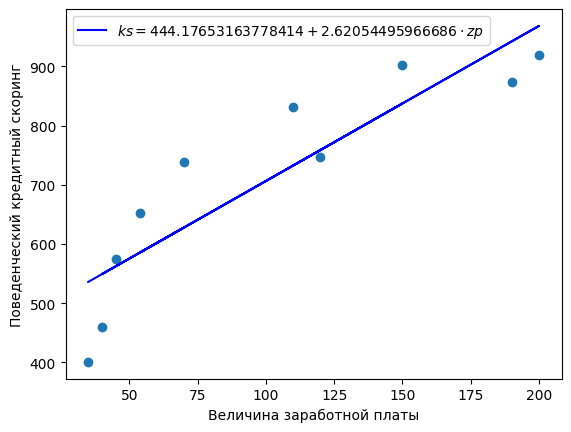

In [34]:
plt.scatter(zp, ks)
plt.plot(zp, a_min + b_min * zp, c = 'b', label=r'$ks=444.17653163778414+2.62054495966686\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()